In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
import matplotlib.pyplot as plt

In [2]:
# Set a random seed so my results stay the same every time
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
# Load my dataset
data = pd.read_csv("dataset1.csv") 

In [5]:
# Get the features and labels ready
X = data.drop('device_category', axis=1)  # These are my feature columns
y = data['device_category']  # This is what I’m predicting

In [6]:
# Fix any non-numeric stuff 
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = pd.to_numeric(X[col], errors='coerce')  # Make it a number if possible
        except:
            X = X.drop(col, axis=1)  # If it’s too weird, drop it

In [10]:
# Check for any missing values before I fill them
print("Looking for any missing vlues in my data...")
print(X.isna().sum())  # Show me where the gaps are

Looking for any missing vlues in my data...
Unnamed: 0                    0
ack                           0
ack_A                         0
ack_B                         0
bytes                         0
                             ..
suffix_is_empty_char_value    0
suffix_is_googleapis.com      0
suffix_is_net                 0
suffix_is_org                 0
suffix_is_unresolved          0
Length: 298, dtype: int64


In [11]:
# Fill missing spots with the average of each column 
X = X.fillna(X.mean())

In [12]:
# Turn my labels into numbers so the model gets it
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [13]:
# Split into training and validation - 80/20 split, keeping it fair
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [14]:
# Normalize everything so it’s on the same level
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [15]:
# Build the model with Batch Normalization 
print("Building my first model with Batch Normalization...")
def build_model_with_bn():
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train_scaled.shape[1],)))  # Starting layer
    model.add(BatchNormalization())  # Help the model stay balanced
    model.add(tf.keras.layers.Activation('relu'))  # Activation time!
    model.add(Dropout(0.3))  # Drop some to avoid overfitting
    model.add(Dense(64))  # Second layer
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32))  # Third layer
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Building my first model with Batch Normalization...


In [16]:
# Build the model without Batch Normalization - for comparison
print("Building my second model without Batch Normalization...")
def build_model_without_bn():
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train_scaled.shape[1],)))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Building my second model without Batch Normalization...


In [17]:
# Train both models 
print("Training my models ...")
model_with_bn = build_model_with_bn()
history_with_bn = model_with_bn.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                                    epochs=50, batch_size=32, verbose=1)

model_without_bn = build_model_without_bn()
history_without_bn = model_without_bn.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                                         epochs=50, batch_size=32, verbose=1)

Training my models ...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.2656 - loss: 2.0843 - val_accuracy: 0.4900 - val_loss: 1.7586
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5294 - loss: 1.5077 - val_accuracy: 0.7600 - val_loss: 1.3518
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6836 - loss: 1.2403 - val_accuracy: 0.7800 - val_loss: 1.0800
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7047 - loss: 1.0732 - val_accuracy: 0.9100 - val_loss: 0.8436
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8039 - loss: 0.8664 - val_accuracy: 0.9100 - val_loss: 0.6975
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8368 - loss: 0.7653 - val_accuracy: 0.9200 - val_loss: 0.5925
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8661 - loss: 0.6153 - val_accuracy: 0.9200 - val_loss: 0.4933
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8619 - loss: 0.5605 - val_accuracy: 0.9250 - v

Drawing  charts to check the progress...


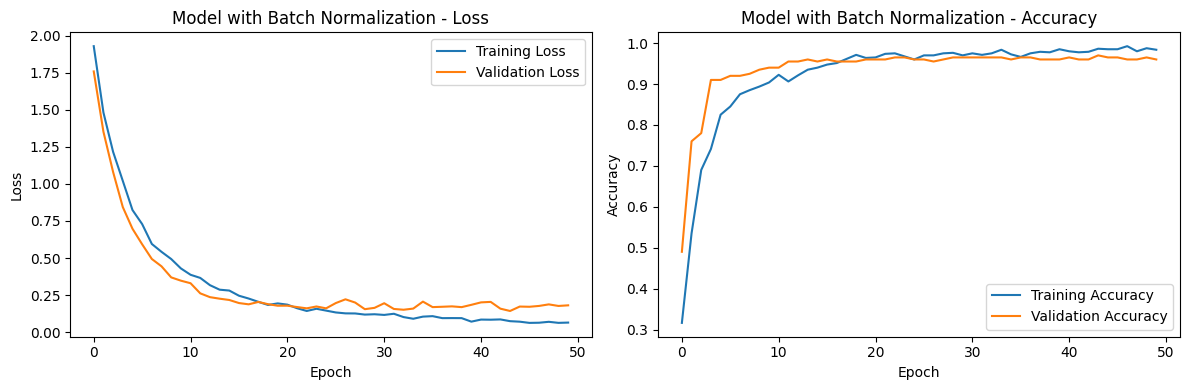

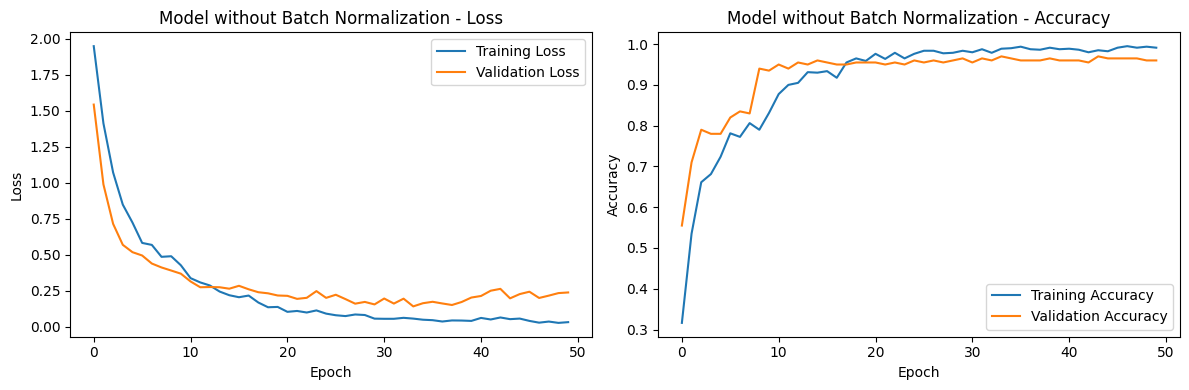

In [18]:
# Plot the results - time to see how I did!
print("Drawing  charts to check the progress...")
def plot_metrics(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_metrics(history_with_bn, "Model with Batch Normalization")
plot_metrics(history_without_bn, "Model without Batch Normalization")